In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

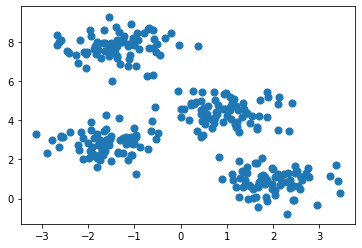

In [2]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50);

In [3]:
# Assign four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

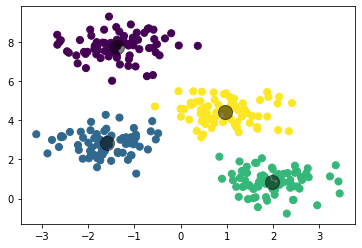

In [5]:
# Import Package
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from the mean of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis') 

plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

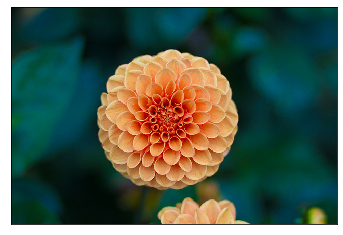

In [6]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [7]:
china.shape

(427, 640, 3)

In [8]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [9]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
    
    # Choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color=colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    
    ax[1].scatter(R, G, color=colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    fig.suptitle(title, size = 20)

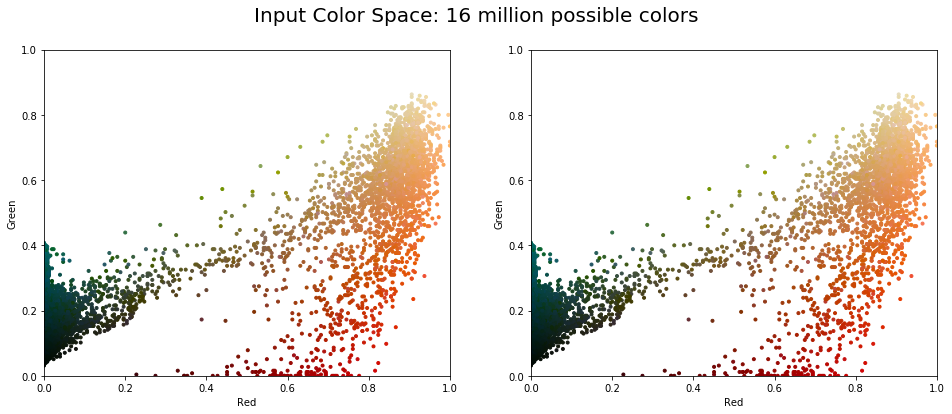

In [10]:
plot_pixels(data, title = "Input Color Space: 16 million possible colors")

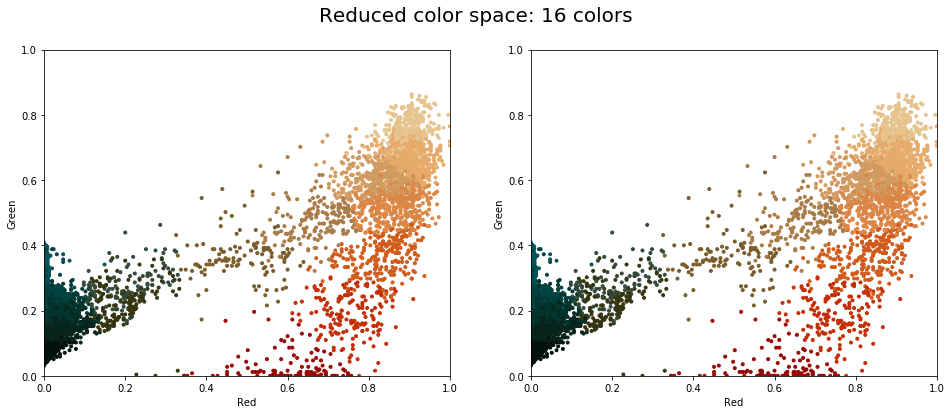

In [12]:
# Fix numpy issues
import warnings; warnings.simplefilter('ignore')
# Reducing these 16b million colors to 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors = new_colors, title = "Reduced color space: 16 colors")

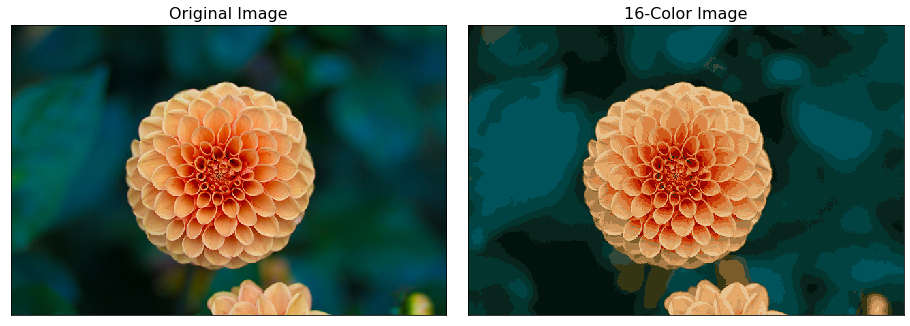

In [13]:
# The result is re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-Color Image', size = 16); 

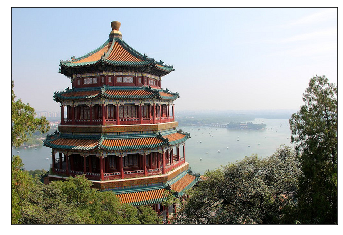

In [14]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [15]:
china.shape

(427, 640, 3)

In [16]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [17]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [18]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
    
    # Choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color=colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    
    ax[1].scatter(R, G, color=colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0, 1))
    fig.suptitle(title, size = 20)

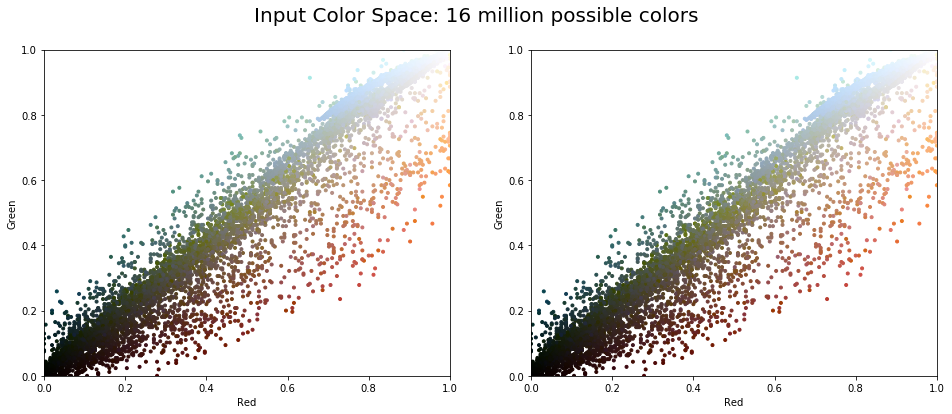

In [19]:
plot_pixels(data, title = "Input Color Space: 16 million possible colors")

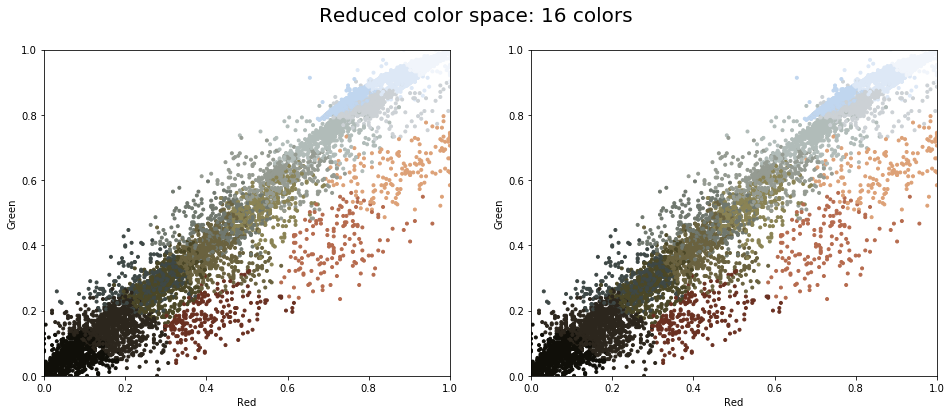

In [20]:
# Fix numpy issues
import warnings; warnings.simplefilter('ignore')
# Reducing these 16b million colors to 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors = new_colors, title = "Reduced color space: 16 colors")

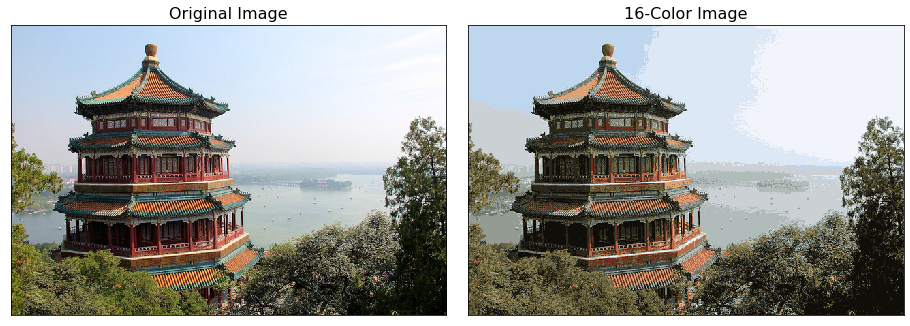

In [21]:
# The result is re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-Color Image', size = 16); 